In [1]:
import pandas as pd
import numpy as np
import os
from plotnine import *
from plotnine.data import *
import matplotlib.pyplot as plt
import seaborn as sns


root_path = '/Users/project/data_analysis'

In [2]:
#convert user behavior dataset
steam = pd.read_csv(os.path.join(root_path, 'data/steam-200k.csv'), header=None, usecols=[0, 1, 2, 3],
                    names=["user_id", "game_name", "behavior", "hours"])

#extract hours
steam['hours']=np.where(steam['behavior']=='play',steam['hours'],0)

#drop duplicates
steam=steam.drop_duplicates(subset=['user_id','game_name'],keep='last')
steam=steam.drop(columns=['behavior'])

#Export to csv
steam.to_csv(os.path.join(root_path, 'data/user_hehavior.csv'),index=None)





/Users/chengjieliu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator


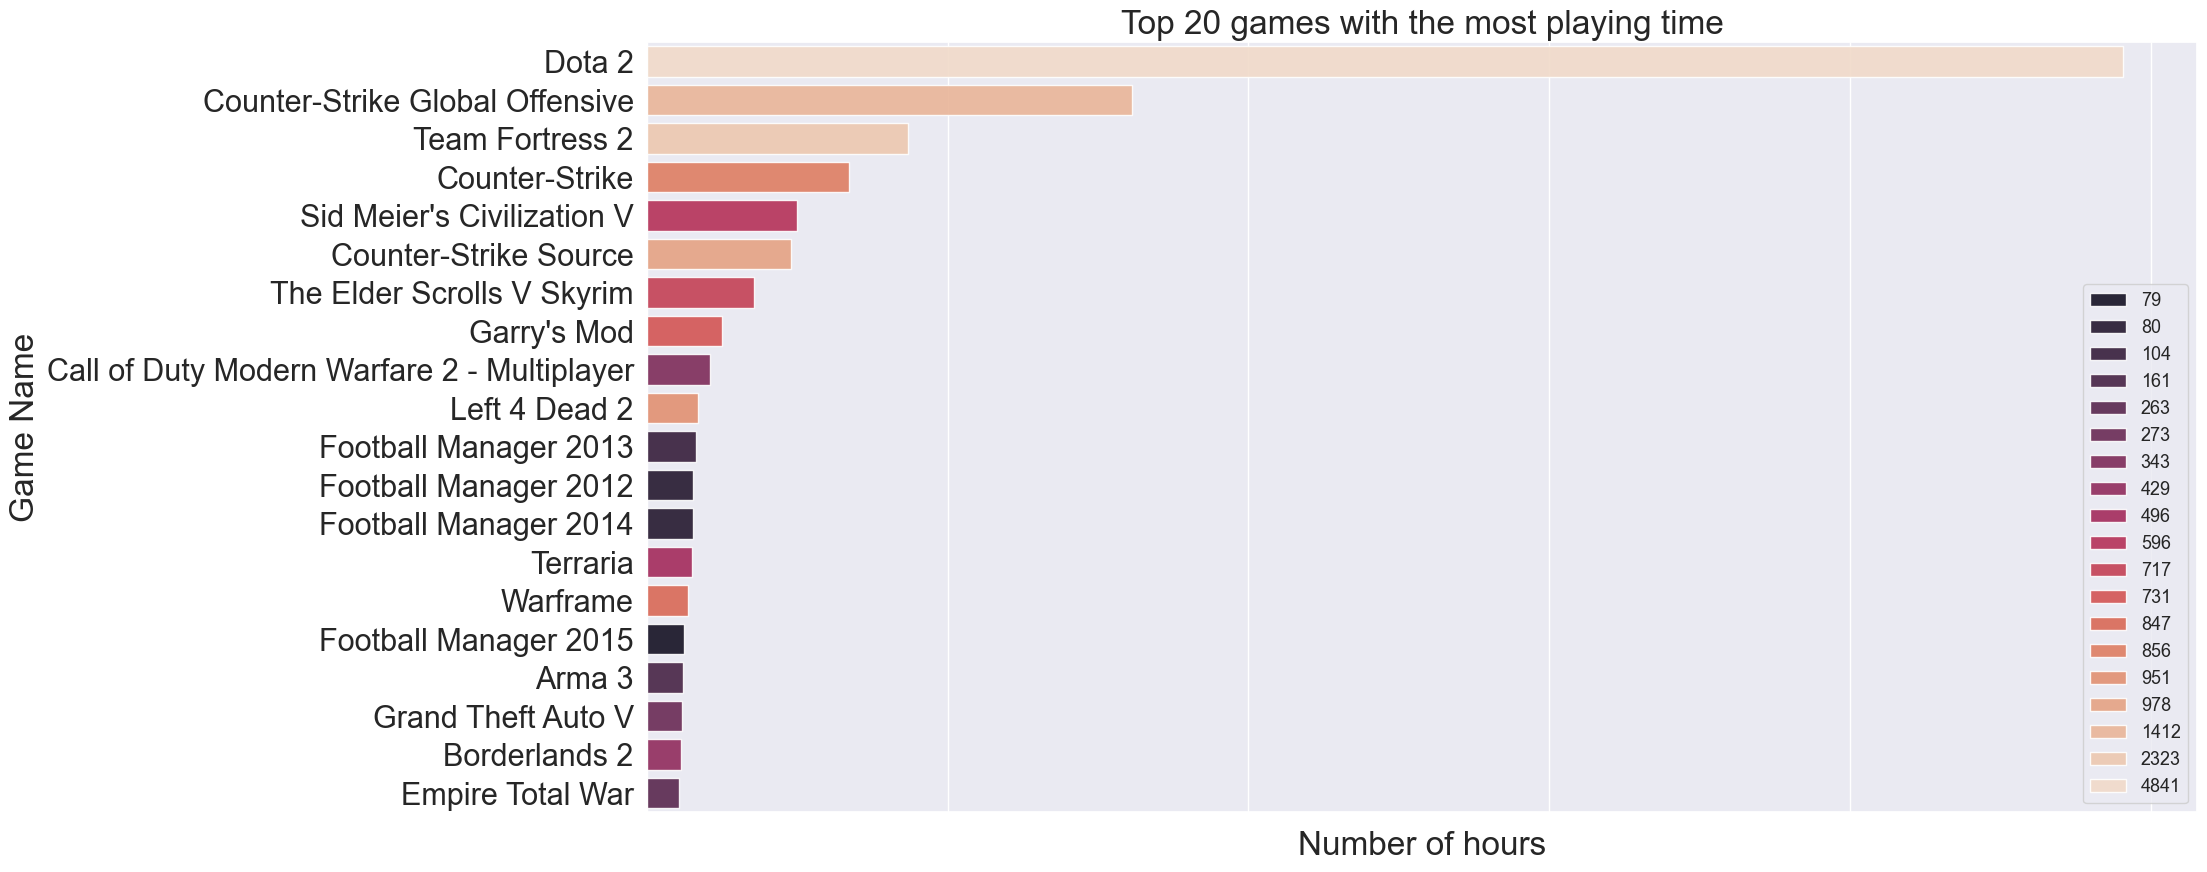

/Users/chengjieliu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


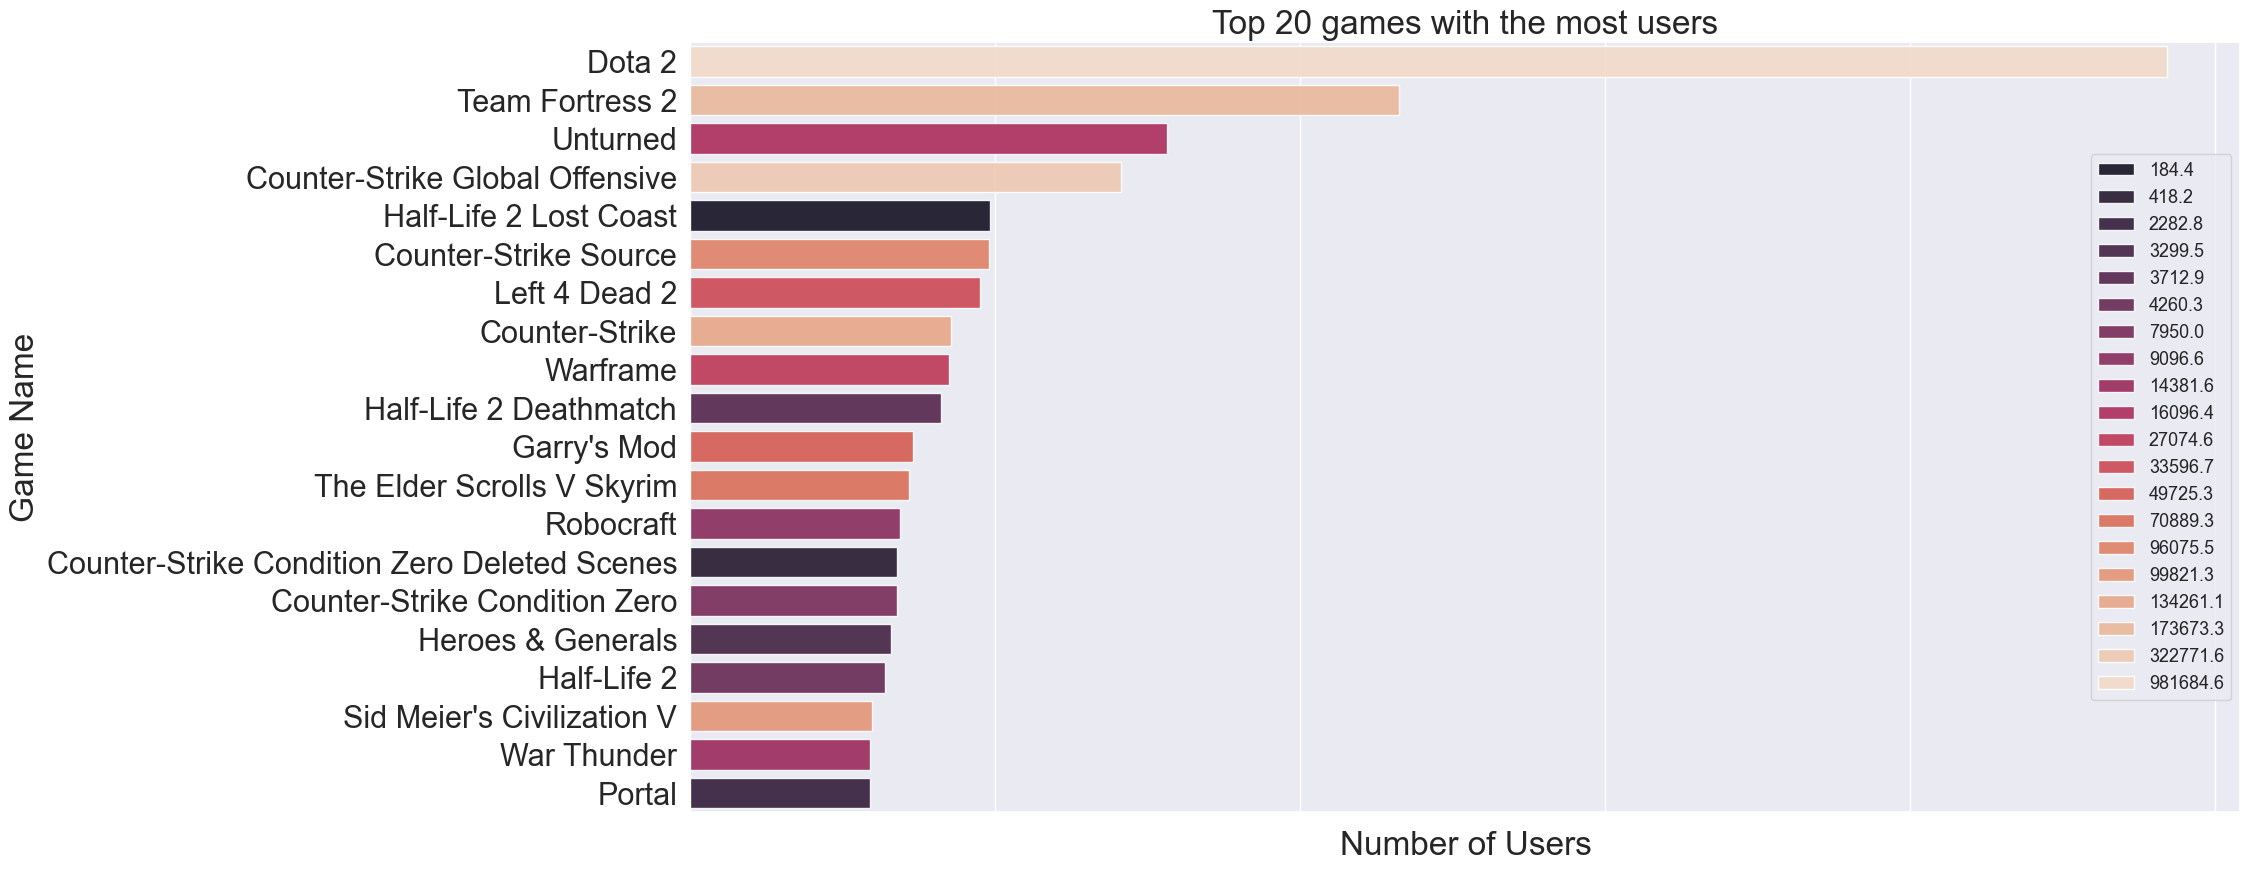

In [8]:


#calculate the top20 number of users and play hours games

game_total_hrs = steam.groupby(by='game_name')['hours'].sum()
most_played_games = game_total_hrs.sort_values( ascending=False)[:20]


# game with the highest number of users
game_freq = steam.groupby(by='game_name').agg({'user_id': 'count', 'hours': 'sum'}).reset_index()
top20_users = game_freq.sort_values(by='user_id',ascending=False)[:20].reset_index()
top20_times = game_freq.sort_values(by='hours',ascending=False)[:20].reset_index()

#draw figures
plt.figure(figsize=(20, 10))
sns.set(font_scale = 2)
ax = sns.barplot(x='hours', y='game_name', hue='user_id',alpha=0.9,data=top20_times, palette='rocket',dodge=False)
ax.set(xlabel='Number of hours', ylabel='Game Name', title='Top 20 games with the most playing time')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(fontsize=13)
plt.show()


plt.figure(figsize=(20, 10))
sns.set(font_scale = 2)
ax = sns.barplot(x='user_id', y='game_name', hue='hours',alpha=0.9,data=top20_users, palette='rocket',dodge=False)
ax.set(xlabel='Number of Users', ylabel='Game Name', title='Top 20 games with the most users')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(fontsize=13)
plt.show()




      popular_tags  count
39           Indie  23718
242         Action  16112
70       Adventure  13378
240         Casual  12969
213     Simulation   9273
..             ...    ...
68   Asymmetric VR      3
144            BMX      3
204   Snowboarding      3
276            ATV      3
26          Skiing      2

[376 rows x 2 columns]


/Users/chengjieliu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


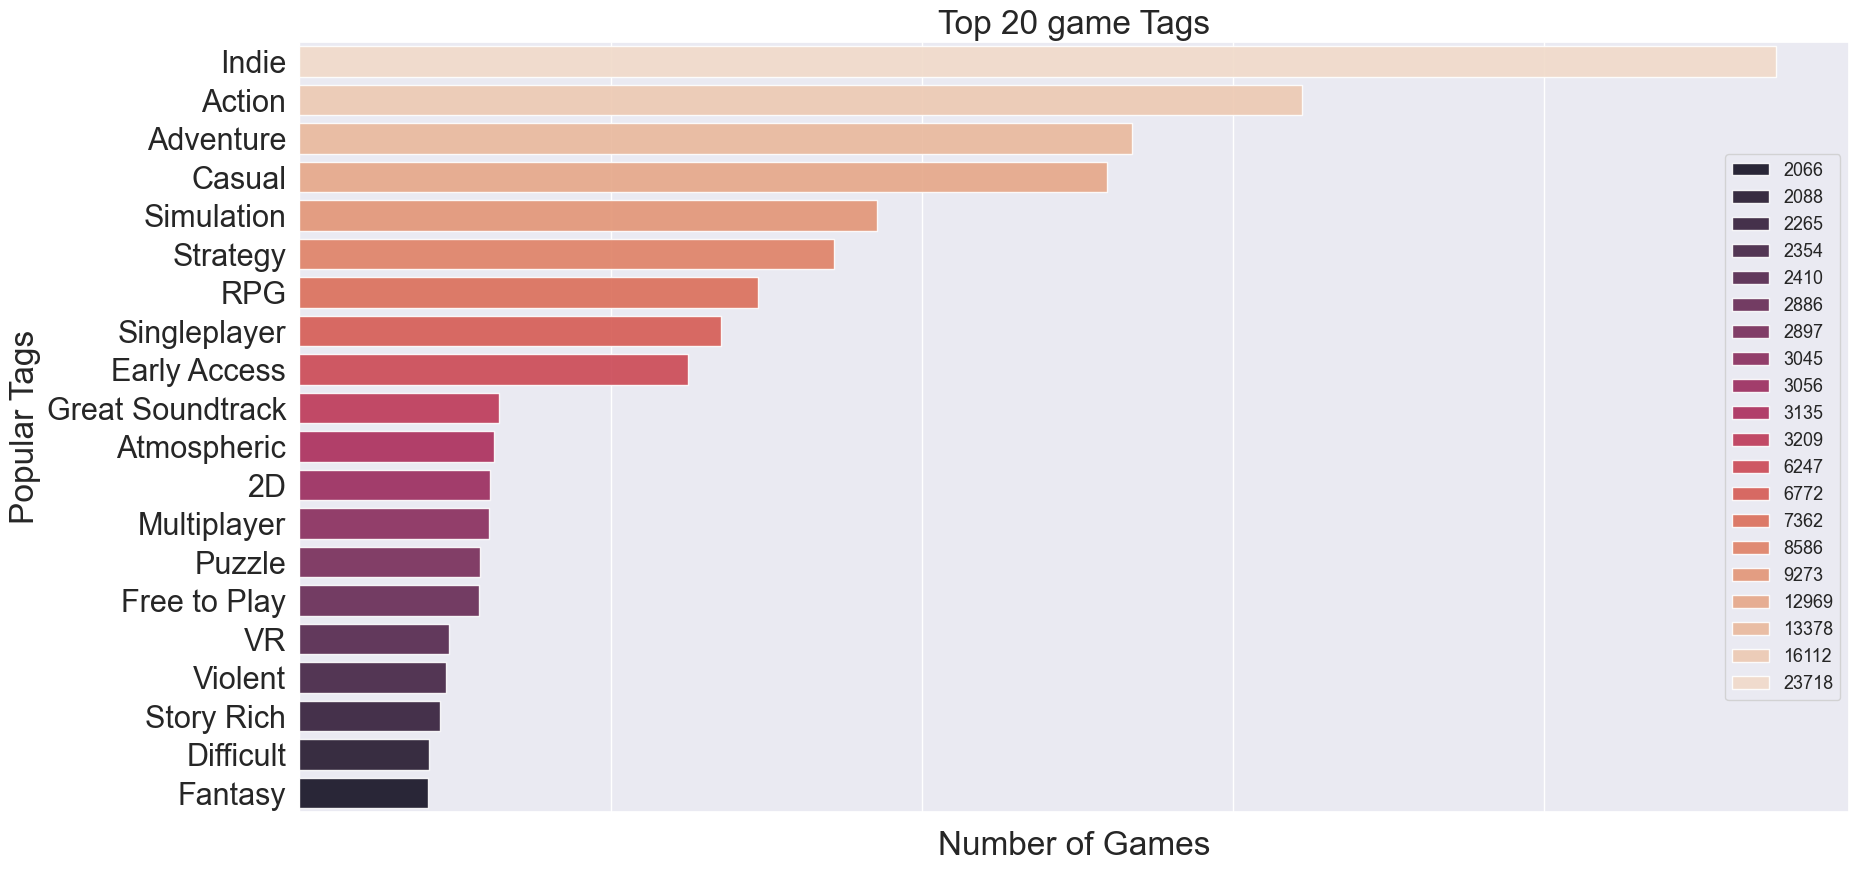

In [46]:
# get tags info from csv
dataGames = pd.read_csv(os.path.join(root_path, 'data/steam_games.csv'), usecols=["popular_tags"])

x = []

for i, row in dataGames.iterrows():
    if type(row["popular_tags"]) is str:
        x = x + row["popular_tags"].split(',')

uniqueGenre = list(set(x))

df = pd.DataFrame(columns=["popular_tags", "count"])
for genre in uniqueGenre:
    df2 = pd.DataFrame(data=[[genre, x.count(genre)]], columns=["popular_tags", "count"])
    df = pd.concat([df, df2], ignore_index=True)

df = df.sort_values(by="count", ascending=False)
print(df)
df = df.head(20)


# draw figure
plt.figure(figsize=(20, 10))
sns.set(font_scale = 2)
ax = sns.barplot(x='count', y='popular_tags', hue='count',alpha=0.9,data=df, palette='rocket',dodge=False)
ax.set(xlabel='Number of Games', ylabel='Popular Tags', title='Top 20 game Tags')
ax.set_xticklabels(ax.get_xticklabels())
ax.legend(fontsize=13)

plt.show()


/Users/chengjieliu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
/Users/chengjieliu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.


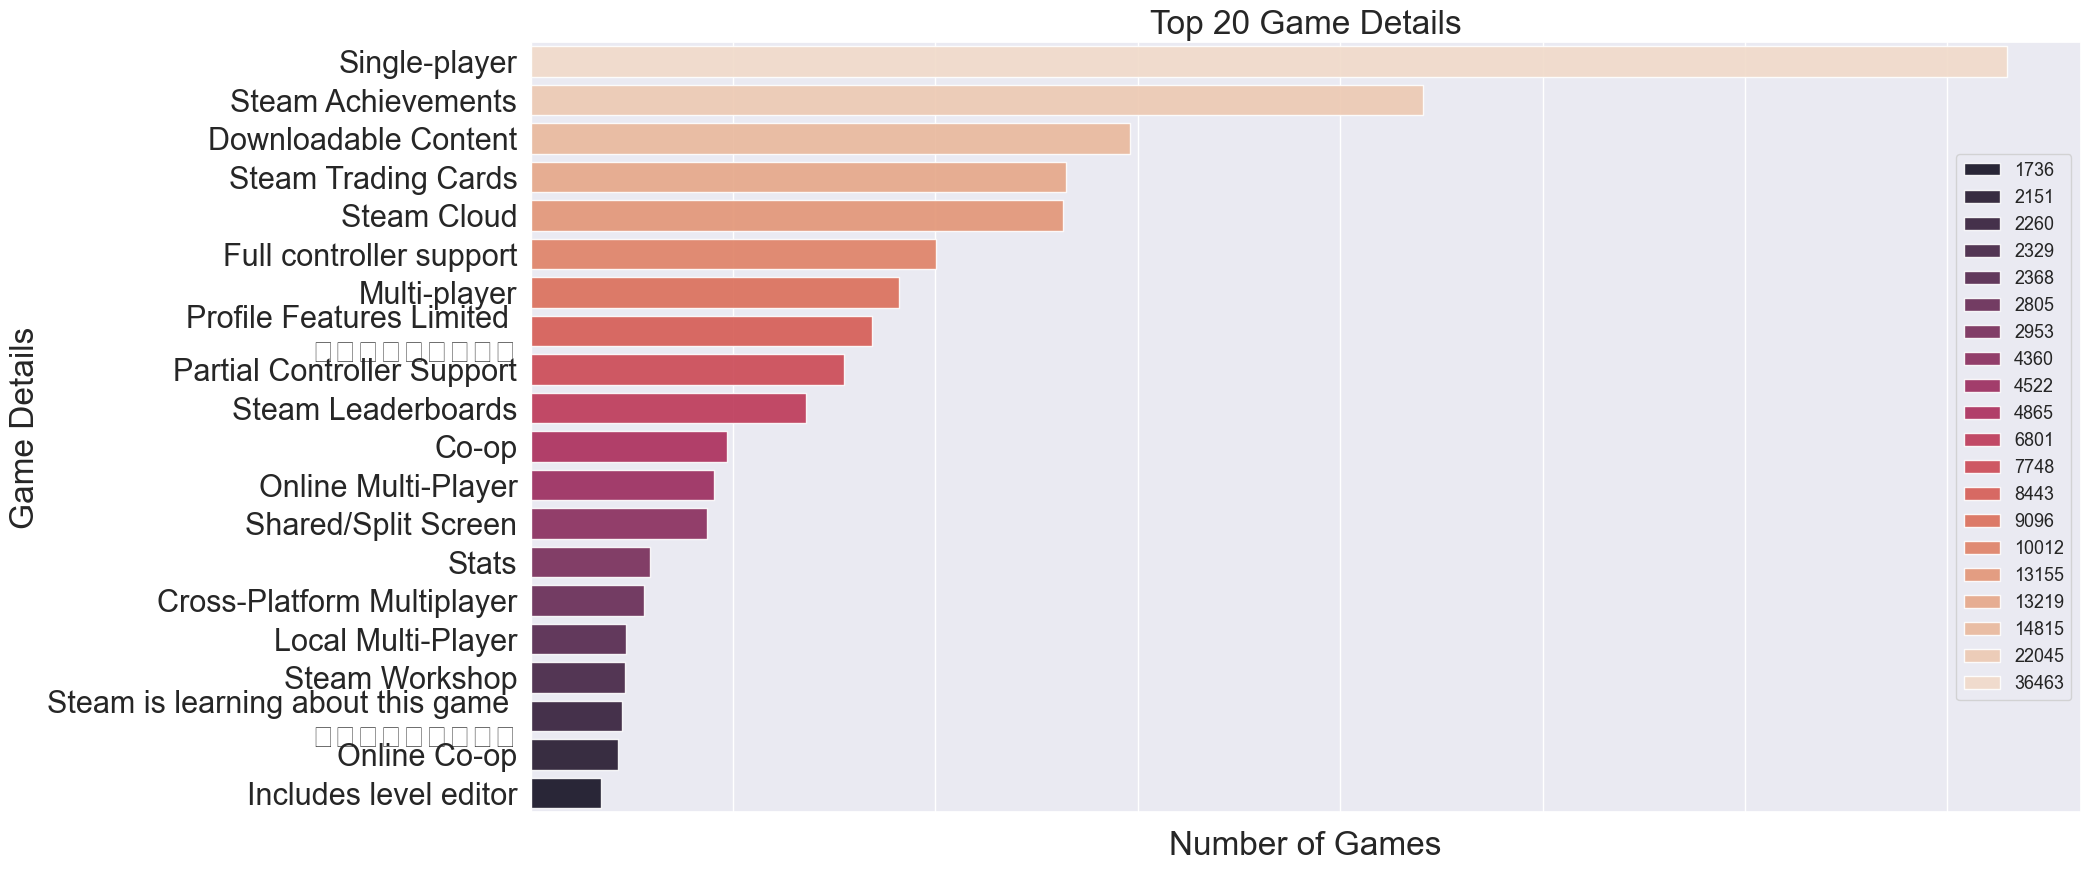

In [11]:
# get review info from csv
dataGames = pd.read_csv(os.path.join(root_path, 'data/steam_games.csv'), usecols=["game_details"])

x = []

for i, row in dataGames.iterrows():
    if type(row["game_details"]) is str:
        x = x + row["game_details"].split(',')

uniqueGenre = list(set(x))

df = pd.DataFrame(columns=["game_details", "count"])
for genre in uniqueGenre:
    df2 = pd.DataFrame(data=[[genre, x.count(genre)]], columns=["game_details", "count"])
    df = pd.concat([df, df2], ignore_index=True)

df = df.sort_values(by="count", ascending=False)
df = df.head(20)


#draw figure
plt.figure(figsize=(20, 10))
sns.set(font_scale = 2)
ax = sns.barplot(x='count', y='game_details', hue='count',alpha=0.9,data=df, palette='rocket',dodge=False)
ax.set(xlabel='Number of Games', ylabel='Game Details', title='Top 20 Game Details')
ax.set_xticklabels(ax.get_xticklabels())
ax.legend(fontsize=13)


plt.show()


/Users/chengjieliu/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


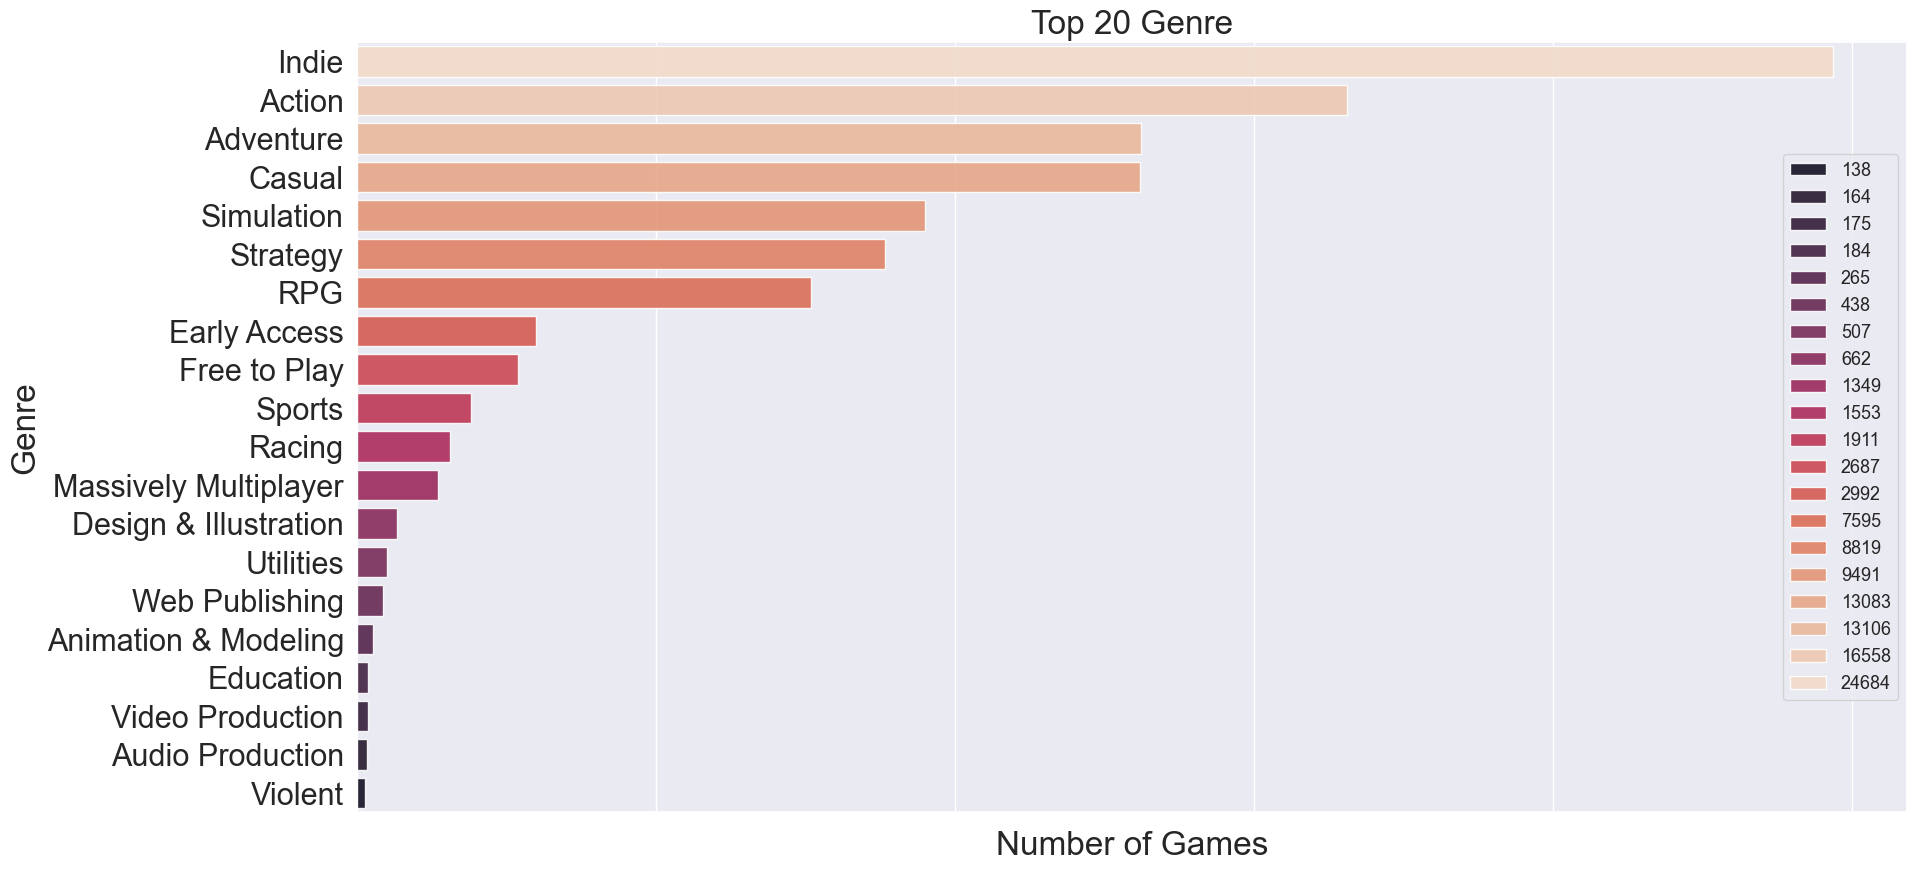

In [13]:
# get review info from csv
dataGames = pd.read_csv(os.path.join(root_path, 'data/steam_games.csv'), usecols=["genre"])

x = []

for i, row in dataGames.iterrows():
    if type(row["genre"]) is str:
        x = x + row["genre"].split(',')

uniqueGenre = list(set(x))

df = pd.DataFrame(columns=["genre", "count"])
for genre in uniqueGenre:
    df2 = pd.DataFrame(data=[[genre, x.count(genre)]], columns=["genre", "count"])
    df = pd.concat([df, df2], ignore_index=True)

df = df.sort_values(by="count", ascending=False)
df = df.head(20)


#draw figure
plt.figure(figsize=(20, 10))
sns.set(font_scale = 2)
ax = sns.barplot(x='count', y='genre', hue='count',alpha=0.9,data=df, palette='rocket',dodge=False)
ax.set(xlabel='Number of Games', ylabel='Genre', title='Top 20 Genre')
ax.set_xticklabels(ax.get_xticklabels())
ax.legend(fontsize=13)


plt.show()

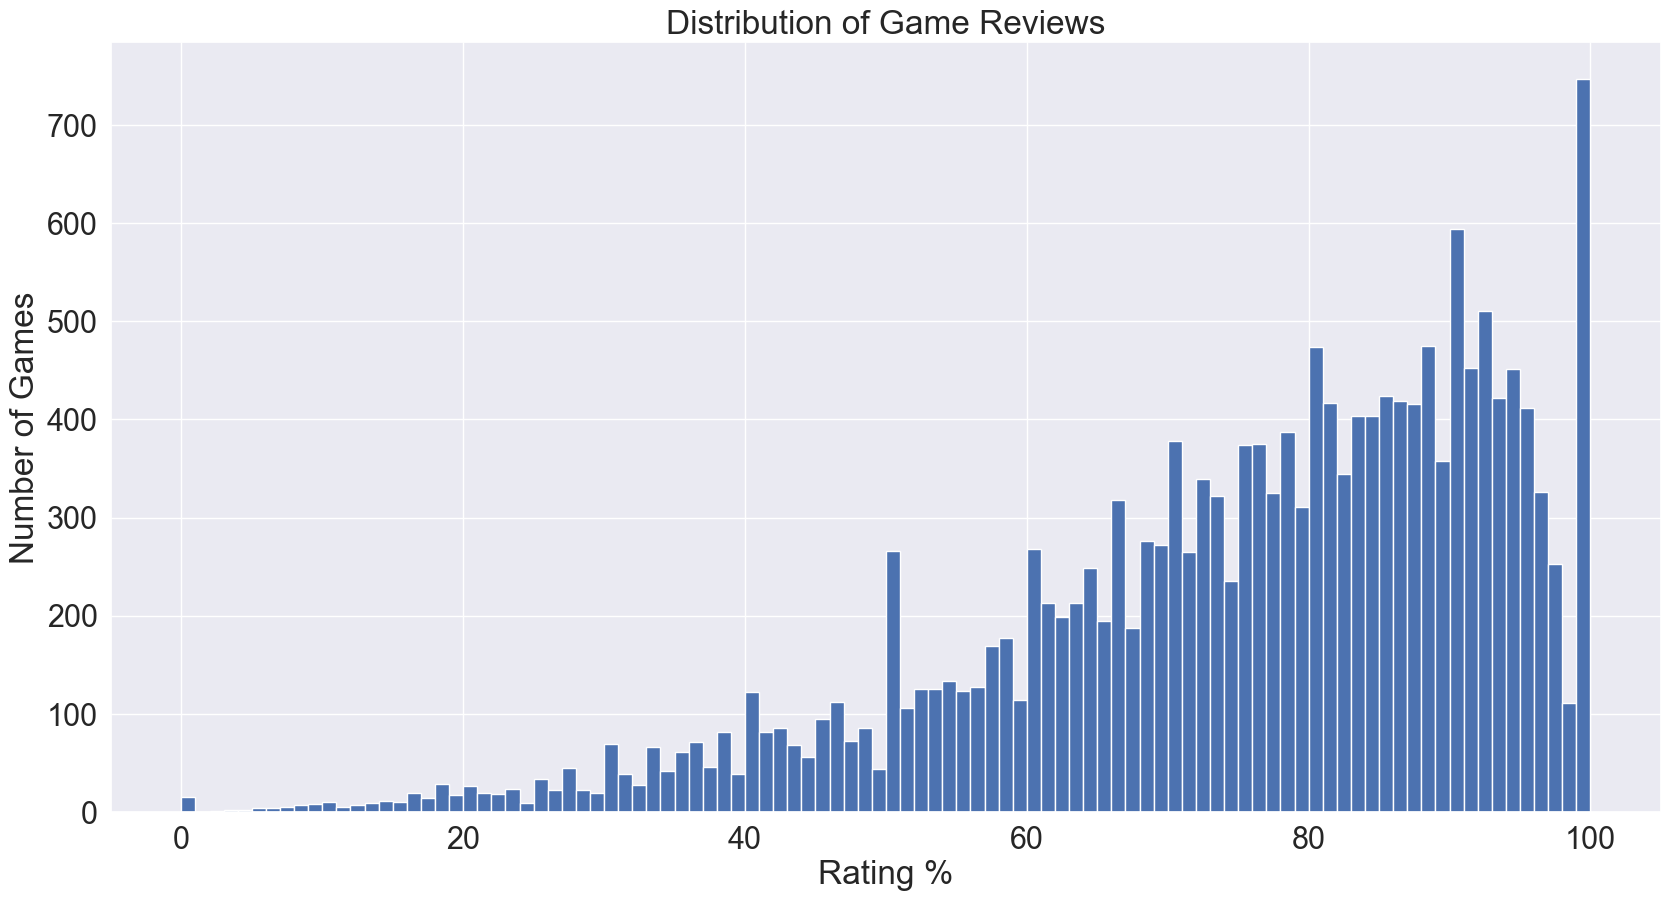

In [10]:
# get Distribution of Game Reviews
plt.figure(figsize=(20, 10))
dataReviews = pd.read_csv(os.path.join(root_path, 'data/steam_games_reviews.csv'), usecols=["name", "percentage_positive_review"])
plt.hist(x=dataReviews["percentage_positive_review"], range=[0, 100], bins=100)
# Add title and axis names
plt.title('Distribution of Game Reviews')
plt.ylabel('Number of Games')
plt.xlabel('Rating %')

plt.show()

In [ ]:
#split training dataset and test dataset

# Get data from CSV
user_behavior = pd.read_csv(os.path.join(root_path, 'data/user_behavior.csv'), usecols=["user_id", "game_name", "hours"])

# get 20% of random elements (combination user-game) for test dataset
testUsers = pd.DataFrame(columns=user_behavior.columns)
trainUsers = pd.DataFrame(columns=user_behavior.columns)

user_behavior = user_behavior.groupby('user_id')
# print(user_behavior.head(10))
for user in user_behavior:
    user = user[1]
    items = len(user)
    if items > 1:
        testUser = user.sample(frac=0.2, replace=False)
        trainUser = user[~user.isin(testUser)].dropna()
        trainUsers = trainUsers.append(trainUser,ignore_index=True)
        testUsers = testUsers.append(testUser,ignore_index=True)

# output csv
testUsers.to_csv(os.path.join(root_path, 'data/steam_user_test.csv'), index=False)
trainUsers.to_csv(os.path.join(root_path, 'data/steam_user_train.csv'), index=False)
print('over')